In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_excel("/Users/sonn/Sonn/Workspace/Projects/IR-HPLCCinnamonProject/data/Data.xlsx", sheet_name="Vungtrong (140)")
data.head(10)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1,21.1.8.YB-13,1,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2,21.1.8.YB-24,1,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3,21.1.8.YB-38,1,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4,21.1.8.YB-40,1,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5,21.1.8.YB-41,1,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001
5,6,21.1.8.YB-42,1,1.02,0.08,4.37,0.246,0.245,0.246,0.245,...,-0.002,-0.002,-0.002,-0.001,-0.001,-0.001,-0.001,-0.002,-0.003,-0.003
6,7,21.1.8.YB-43,1,1.45,0.09,3.30,0.260,0.261,0.262,0.260,...,-0.004,-0.005,-0.005,-0.004,-0.003,-0.004,-0.004,-0.005,-0.005,-0.005
7,8,21.1.8.YB-44,1,1.65,0.06,4.01,0.248,0.248,0.248,0.247,...,-0.002,-0.003,-0.002,-0.001,-0.001,-0.001,-0.002,-0.003,-0.003,-0.003
8,9,21.1.8.YB-47,1,0.77,0.03,3.10,0.237,0.237,0.235,0.235,...,0.004,0.004,0.004,0.004,0.005,0.005,0.004,0.003,0.003,0.003
9,10,21.1.8.YB-48,1,1007.00,0.04,4.59,0.266,0.267,0.268,0.264,...,-0.001,-0.001,-0.001,0.000,0.000,0.000,-0.001,-0.001,-0.002,-0.002


In [3]:
y = data["Group"]
le = LabelEncoder()
y = le.fit_transform(y)
X = data.iloc[:, 6:]
X.columns = X.columns.astype(str)
cols = X.columns
print(np.unique(y))
print(le.inverse_transform(np.unique(y)))

[0 1 2 3]
[1 2 3 4]


In [4]:
X = savgol_filter(X, window_length=25, polyorder=3, deriv=1)

In [5]:
X = pd.DataFrame(X, columns=cols)

In [6]:
X = np.array(X)
y = np.array(y)

n_classes = len(np.unique(y))
n_test_samples_per_class = int(len(X) * 0.25 / n_classes)

classes = np.unique(y)

X_train_list, X_test_list = [], []
y_train_list, y_test_list = [], []

# For each class, split data to have equal test size
for cls in classes:
    # Get indices for this class
    class_indices = np.where(y == cls)[0]
    
    # Split the data for this class
    X_class, X_class_test, y_class, y_class_test = train_test_split(
        X[class_indices], y[class_indices], test_size=n_test_samples_per_class, random_state=42
    )
    
    # Append the splits to the train/test lists
    X_train_list.append(X_class)
    X_test_list.append(X_class_test)
    y_train_list.append(y_class)
    y_test_list.append(y_class_test)

# Combine back into arrays
X_train = np.vstack(X_train_list)  # Combine all classes' training data
X_test = np.vstack(X_test_list)      # Combine all classes' test data
y_train = np.hstack(y_train_list)  # Combine all classes' training labels
y_test = np.hstack(y_test_list)      # Combine all classes' test labels

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)

Training set shape: (107, 1701) (107,)
Validation set shape: (32, 1701) (32,)


RandomForest

In [7]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
X_background = shap.sample(X_train, 100, random_state=42)
X_eval = X_test[:100]

In [9]:
explainer = shap.KernelExplainer(clf.predict_proba, X_background)
shap_values = explainer.shap_values(X_eval, nsamples=100)  # mặc định ~ 2×số feature



  0%|          | 0/32 [00:00<?, ?it/s]/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: divide by zero encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: overflow encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: invalid value encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: divide by zero encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: overflow encountered in matmul
  w = np.linalg.solve(X.T @ WX, 

SHAP raw shape: (1701, 4)
X_eval shape: (32, 1701)
✅ SHAP fixed shape: (4, 1701)


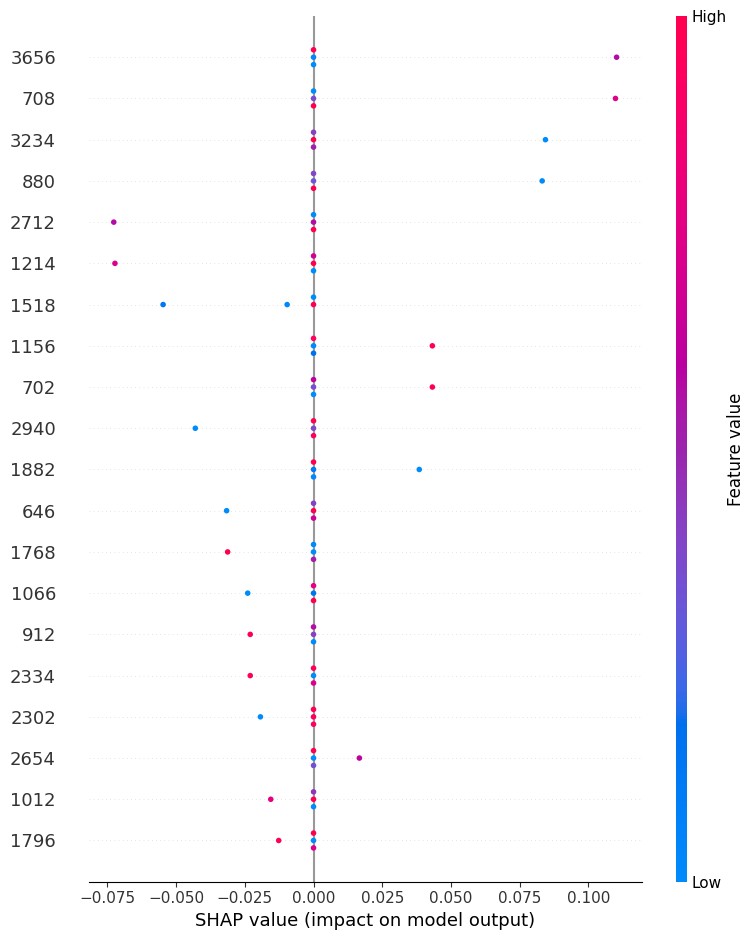


🌟 Top 10 bước sóng ảnh hưởng nhất (class 1):
 - 3656 nm: 0.0276
 - 708 nm: 0.0275
 - 3234 nm: 0.0211
 - 880 nm: 0.0208
 - 2712 nm: 0.0182
 - 1214 nm: 0.0181
 - 1518 nm: 0.0161
 - 1156 nm: 0.0108
 - 702 nm: 0.0108
 - 2940 nm: 0.0108


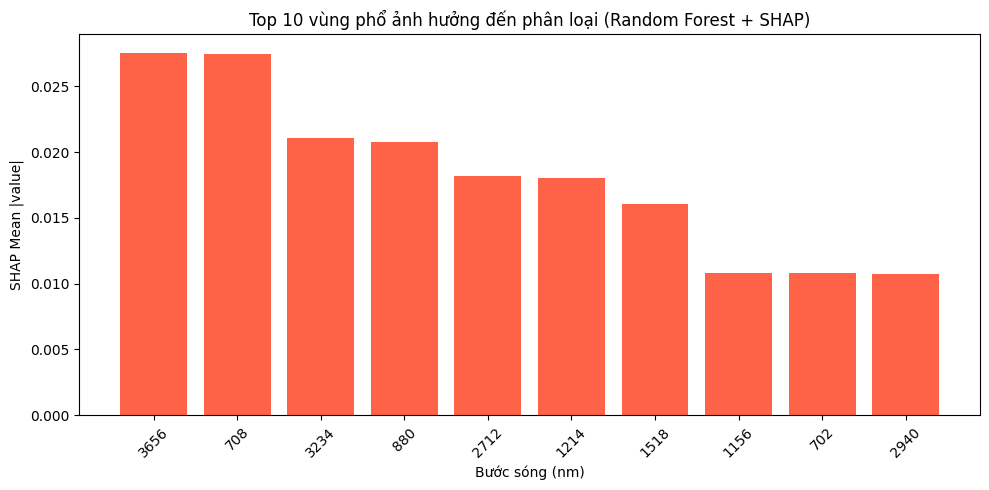

In [10]:
# ===== STEP 4: Kiểm tra và xử lý transpose nếu cần =====
print("SHAP raw shape:", np.array(shap_values[1]).shape)
print("X_eval shape:", X_eval.shape)

# Nếu bị ngược (số đặc trưng > số mẫu):
if np.array(shap_values[1]).shape[0] == X_eval.shape[1]:
    shap_vals = np.array(shap_values[1]).T
else:
    shap_vals = np.array(shap_values[1])

print("✅ SHAP fixed shape:", shap_vals.shape)

# ===== STEP 5: Vẽ SHAP summary plot =====

# Chuyển SHAP về đúng chiều
shap_vals = np.array(shap_values[1]).T  # (4, 1701)

# # Cắt X_eval tương ứng
# X_eval_df = pd.DataFrame(X_eval, columns=cols)
# Cắt X_eval tương ứng
X_eval_df = pd.DataFrame(X_eval[:shap_vals.shape[0]], columns=cols)


# Vẽ SHAP summary
shap.summary_plot(shap_vals, X_eval_df, feature_names=X_eval_df.columns)



# ===== STEP 6: Trích vùng phổ ảnh hưởng nhất =====
mean_abs_shap = np.abs(shap_vals).mean(axis=0)
top_indices = np.argsort(mean_abs_shap)[::-1]
top_wavelengths = X_eval_df.columns[top_indices[:10]]

top_importances = mean_abs_shap[top_indices[:10]]

print("\n🌟 Top 10 bước sóng ảnh hưởng nhất (class 1):")
for wl, imp in zip(top_wavelengths, top_importances):
    print(f" - {wl} nm: {imp:.4f}")

# ===== STEP 7: Biểu đồ thanh top bước sóng =====
plt.figure(figsize=(10, 5))
plt.bar(top_wavelengths, top_importances, color="tomato")
plt.title("Top 10 vùng phổ ảnh hưởng đến phân loại (Random Forest + SHAP)")
plt.xlabel("Bước sóng (nm)")
plt.ylabel("SHAP Mean |value|")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AdaBoost

In [11]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [12]:
X_background = shap.sample(X_train, 100, random_state=42)
X_eval = X_test[:100]

In [13]:
explainer = shap.KernelExplainer(clf.predict_proba, X_background)
shap_values = explainer.shap_values(X_eval, nsamples=100)  # mặc định ~ 2×số feature



  0%|          | 0/32 [00:00<?, ?it/s]/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: divide by zero encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: overflow encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: invalid value encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
  3%|▎         | 1/32 [00:01<00:34,  1.13s/it]/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: divide by zero encountered in matmul
  w = np.linalg.solve(X.T @ WX, WX.T @ y)
/Users/sonn/anaconda3/envs/WSPytorch3.11/lib/python3.11/site-packages/shap/explainers/_kernel.py:706: RuntimeWarning: overflow encounte

SHAP raw shape: (1701, 4)
X_eval shape: (32, 1701)
✅ SHAP fixed shape: (4, 1701)


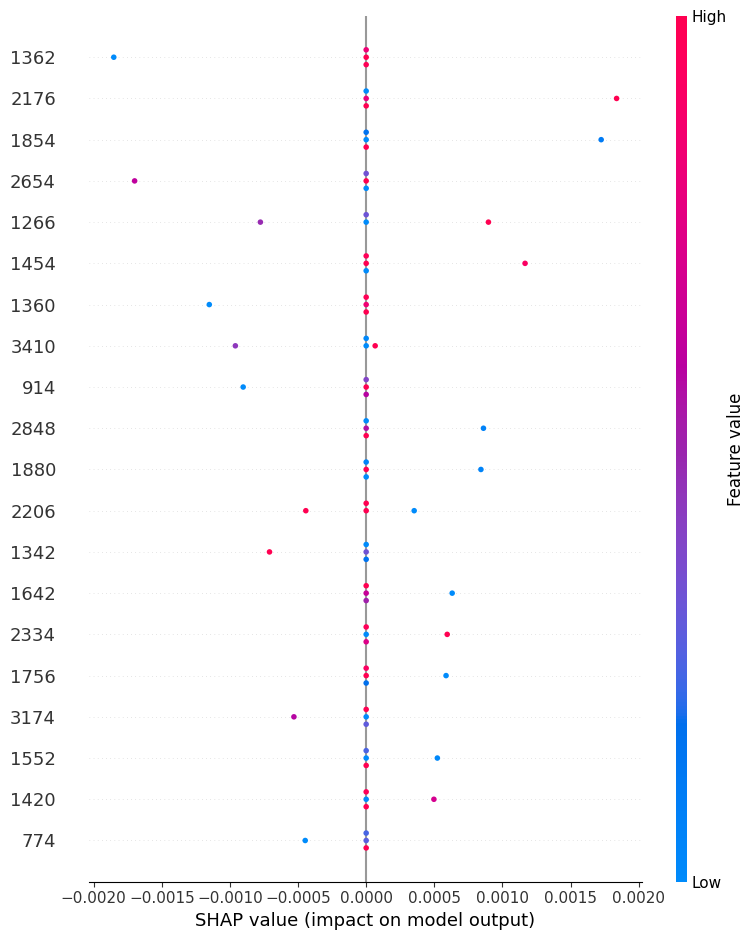


🌟 Top 10 bước sóng ảnh hưởng nhất (class 1):
 - 1362 nm: 0.0005
 - 2176 nm: 0.0005
 - 1854 nm: 0.0004
 - 2654 nm: 0.0004
 - 1266 nm: 0.0004
 - 1454 nm: 0.0003
 - 1360 nm: 0.0003
 - 3410 nm: 0.0003
 - 914 nm: 0.0002
 - 2848 nm: 0.0002


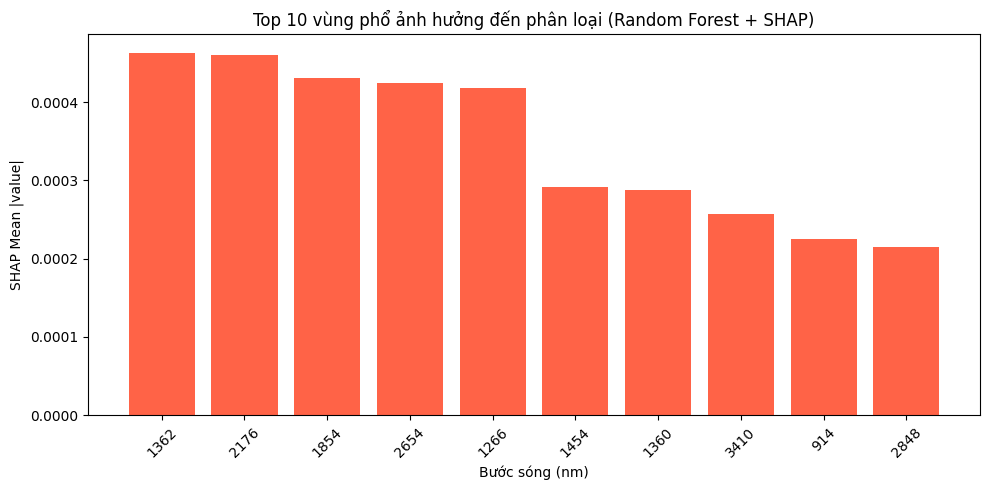

In [14]:
# ===== STEP 4: Kiểm tra và xử lý transpose nếu cần =====
print("SHAP raw shape:", np.array(shap_values[1]).shape)
print("X_eval shape:", X_eval.shape)

# Nếu bị ngược (số đặc trưng > số mẫu):
if np.array(shap_values[1]).shape[0] == X_eval.shape[1]:
    shap_vals = np.array(shap_values[1]).T
else:
    shap_vals = np.array(shap_values[1])

print("✅ SHAP fixed shape:", shap_vals.shape)

# ===== STEP 5: Vẽ SHAP summary plot =====

# Chuyển SHAP về đúng chiều
shap_vals = np.array(shap_values[1]).T  # (4, 1701)

# # Cắt X_eval tương ứng
# X_eval_df = pd.DataFrame(X_eval, columns=cols)
# Cắt X_eval tương ứng
X_eval_df = pd.DataFrame(X_eval[:shap_vals.shape[0]], columns=cols)


# Vẽ SHAP summary
shap.summary_plot(shap_vals, X_eval_df, feature_names=X_eval_df.columns)



# ===== STEP 6: Trích vùng phổ ảnh hưởng nhất =====
mean_abs_shap = np.abs(shap_vals).mean(axis=0)
top_indices = np.argsort(mean_abs_shap)[::-1]
top_wavelengths = X_eval_df.columns[top_indices[:10]]

top_importances = mean_abs_shap[top_indices[:10]]

print("\n🌟 Top 10 bước sóng ảnh hưởng nhất (class 1):")
for wl, imp in zip(top_wavelengths, top_importances):
    print(f" - {wl} nm: {imp:.4f}")

# ===== STEP 7: Biểu đồ thanh top bước sóng =====
plt.figure(figsize=(10, 5))
plt.bar(top_wavelengths, top_importances, color="tomato")
plt.title("Top 10 vùng phổ ảnh hưởng đến phân loại (Random Forest + SHAP)")
plt.xlabel("Bước sóng (nm)")
plt.ylabel("SHAP Mean |value|")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()